In [14]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

kaggle_directory1 = '/kaggle/input/datascienceproject4/chest_xray/train'
kaggle_directory2 = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
local = './chest_xray/train'
local_valid = './chest_xray/val'
local_test = './chest_xray/test'
normal_directory = os.path.join(local,'NORMAL' )
pneumonia_directory = os.path.join(local,'PNEUMONIA' )
cleaned_data_directory = './cleaned_data'
edgedImages_data_directory = './edge_images'
normalizedImages_data_directory = './normalized_images_equal_ratio'
normalizedImages_data_directory_valid = './normalized_images_equal_ratio_valid'
normalizedImages_data_directory_test = './normalized_images_equal_ratio_test'

In [ ]:
# Function to check for missing values in an image
def check_missing_values(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Check for missing values (e.g., NaN or None)
    missing_values = np.isnan(image).sum()  # Example for NumPy array
    if missing_values > 0:
        print(f"Missing values found in image: {image_path}")
    else:
        print(f"No missing values found in image: {image_path}")

# List all files under the input directory
for dirname, _, filenames in os.walk(local):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        check_missing_values(image_path)

In [ ]:
# Function to check for missing values in an image and plot histogram
def check_missing_values_and_plot_histogram(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check for missing values (e.g., NaN or None)
    missing_values = np.isnan(image).sum()  # Example for NumPy array
    if missing_values > 0:
        print(f"Missing values found in image: {image_path}")
    else:
        print(f"No missing values found in image: {image_path}")

    # Plot histogram of pixel intensities
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensities')
    plt.show()


In [ ]:
check_missing_values_and_plot_histogram(local)

In [ ]:
#An image histogram is a type of histogram that acts as a 
#graphical representation of the tonal distribution in a 
#digital image. It plots the number of pixels for each tonal value. 
#By looking at the histogram for a specific image a viewer will be able
#to judge the entire tonal distribution at a glance.
#The horizontal axis of the graph represents 
#the tonal variations, while the vertical axis represents 
#the total number of pixels in that particular tone.[1]

**Combined Histogram**

In [ ]:
# Function to accumulate histograms of all images in a directory
def accumulate_histograms(directory):
    # Initialize an empty list to store histograms
    histograms = []

    # List all files under the specified directory
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            # Load image
            image_path = os.path.join(dirname, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Calculate histogram
            hist = cv2.calcHist([image], [0], None, [256], [0, 256])

            # Append histogram to the list
            histograms.append(hist)

    # Combine histograms using numpy sum function along axis 0
    combined_hist = np.sum(histograms, axis=0)

    return combined_hist

# Function to plot a histogram
def plot_histogram(hist, data_name):
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensities' + ' of ' + data_name + ' data set')
    plt.show()

# Directory containing the image data
# data_directory = '/kaggle/input/datascienceproject4/chest_xray/train'

# Accumulate histograms of all images
combined_hist = accumulate_histograms(normal_directory)
# Plot the combined histogram
plot_histogram(combined_hist, 'NORMAL')

# Accumulate histograms of all images
combined_hist = accumulate_histograms(pneumonia_directory)
# Plot the combined histogram
plot_histogram(combined_hist, 'PNEUMONIA')


In [ ]:
# Define the subdirectories for normal and pneumonia-infected individuals
# normal_directory = os.path.join(data_directory, 'NORMAL')
# pneumonia_directory = os.path.join(data_directory, 'PNEUMONIA')

# Define the number of sample images to display from each category
num_samples = 5

# Function to display sample images
def display_sample_images(directory, label):
    print(f"Sample images for {label} category:")
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, filename in enumerate(os.listdir(directory)[:num_samples]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Display sample images for normal and pneumonia categories
display_sample_images(normal_directory, 'NORMAL')
display_sample_images(pneumonia_directory, 'PNEUMONIA')


**Data Cleaning**

In [ ]:
import os
from PIL import Image
import imagehash
import shutil

# Define the directory containing the original data
# original_data_directory = '/kaggle/input/datascienceproject4/chest_xray/train'

# Define the directory for the cleaned data
# cleaned_data_directory = '/kaggle/working/cleaned_data'
cleaned_data_directory = './cleaned_data'

# Copy the original data to the cleaned data directory
# shutil.copytree(original_data_directory, cleaned_data_directory)

shutil.copytree(local, cleaned_data_directory)

In [ ]:
def count_files_in_directories(directory):
    try:
        for subdir, _, files in os.walk(directory):
            print(f"Directory: {subdir}, Number of files: {len(files)}")
    except FileNotFoundError:
        print("Directory not found.")

# Function to remove duplicate images
def remove_duplicates(directory):
    hash_dict = {}
    duplicates = []

    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            with Image.open(image_path) as img:
                hash_value = str(imagehash.average_hash(img))
            if hash_value in hash_dict:
                duplicates.append(image_path)
            else:
                hash_dict[hash_value] = image_path

    # Remove duplicate images
    for duplicate in duplicates:
        os.remove(duplicate)

# Function to remove samples with missing images
def remove_missing_samples(directory):
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            if not os.path.exists(image_path):
                os.remove(image_path)

In [52]:
print("Count of files BEFORE removing missing sample and duplicates")
count_files_in_directories(cleaned_data_directory)

# Remove duplicate images from the cleaned data directory
remove_duplicates(cleaned_data_directory)
print("Count of files after removing duplicates")
count_files_in_directories(cleaned_data_directory)

# Remove samples with missing images from the cleaned data directory
remove_missing_samples(cleaned_data_directory)
print("Count of files after removing missing sample")
count_files_in_directories(cleaned_data_directory)


Count of files BEFORE removing missing sample and duplicates
Directory: ./cleaned_data, Number of files: 0
Directory: ./cleaned_data\NORMAL, Number of files: 1260
Directory: ./cleaned_data\PNEUMONIA, Number of files: 3702
Count of files after removing duplicates
Directory: ./cleaned_data, Number of files: 0
Directory: ./cleaned_data\NORMAL, Number of files: 1260
Directory: ./cleaned_data\PNEUMONIA, Number of files: 3702
Count of files after removing missing sample
Directory: ./cleaned_data, Number of files: 0
Directory: ./cleaned_data\NORMAL, Number of files: 1260
Directory: ./cleaned_data\PNEUMONIA, Number of files: 3702


In [ ]:
import random

# Function to apply Adaptive Histogram Equalization (AHE) to an image
def apply_ahe(image):
    # Convert image to grayscale if not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Adaptive Histogram Equalization (AHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    
    return enhanced_image

# Function to apply Contrast-Limited Adaptive Histogram Equalization (CLAHE) to an image
def apply_clahe(image):
    # Convert image to grayscale if not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Contrast-Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    
    return enhanced_image

# # List all files under the input directory
# for dirname, _, filenames in os.walk('/kaggle/working/cleaned_data'):
#     for filename in filenames:
#         image_path = os.path.join(dirname, filename)
        
#         # Load image
#         image = cv2.imread(image_path)
        
#         # Apply AHE and CLAHE
#         ahe_image = apply_ahe(image)
#         clahe_image = apply_clahe(image)
        
#         # Plot original and enhanced images
#         plt.figure(figsize=(10, 4))
#         plt.subplot(1, 3, 1)
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#         plt.title('Original Image')
#         plt.axis('off')
        
#         plt.subplot(1, 3, 2)
#         plt.imshow(ahe_image, cmap='gray')
#         plt.title('AHE')
#         plt.axis('off')
        
#         plt.subplot(1, 3, 3)
#         plt.imshow(clahe_image, cmap='gray')
#         plt.title('CLAHE')
#         plt.axis('off')
        
#         plt.show()


for subdir in ['normal', 'pneumonia']:
    print(f"Random files from {subdir}:")
    
    # Get all file names from the current subdirectory
    files = os.listdir(os.path.join(cleaned_data_directory, subdir))
    
    # Randomly select 10 files
    random_files = random.sample(files, min(5, len(files)))
    
    for filename in random_files:
        # Construct the full path to the image
        image_path = os.path.join(cleaned_data_directory, subdir, filename)
        
        # Load image
        image = cv2.imread(image_path)
        
        # Apply AHE and CLAHE
        ahe_image = apply_ahe(image)
        clahe_image = apply_clahe(image)
        
        # Plot original and enhanced images
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(ahe_image, cmap='gray')
        plt.title('AHE')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(clahe_image, cmap='gray')
        plt.title('CLAHE')
        plt.axis('off')
        
        plt.show()


**Edge Detection Techniques**

In [ ]:
# Function to apply Canny edge detection to an image
def apply_canny_edge_detection(image):
    # Convert image to grayscale if not already
    if len(image.shape) > 2:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)  # Adjust thresholds as needed

    return edges

# Function to list all files under a directory
def list_files(directory):
    files = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(dirname, filename))
    return files

# Define the directory containing the data
# data_directory = '/kaggle/working/cleaned_data'

# List all files under the input directory
# data_files = list_files(data_directory)
data_files = list_files(cleaned_data_directory)

# Define the output directory for edge-detected images
# output_dir = '/kaggle/working/edge_images'
output_dir = edgedImages_data_directory

os.makedirs(output_dir, exist_ok=True)

# Iterate over each image in the data directory
for image_path in data_files:
    # Load the image
    image = cv2.imread(image_path)
    
    # Apply Canny edge detection
    edges = apply_canny_edge_detection(image)
    
    # Save the edge-detected image
    # filename = os.path.basename(image_path)
    # cv2.imwrite(os.path.join(output_dir, filename), edges)

    # Determine the parent folder name (normal or pneumonia)
    parent_folder = os.path.basename(os.path.dirname(image_path))
    
    # Create the corresponding output directory if it doesn't exist
    output_subdir = os.path.join(output_dir, parent_folder)
    os.makedirs(output_subdir, exist_ok=True)
    
    # Save the edge-detected image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_subdir, filename)
    cv2.imwrite(output_path, edges)


**Image Pre-Processing - Normalization**

In [15]:
# Define directories
# input_directory = '/kaggle/input/datascienceproject4/chest_xray/train'
# output_directory = '/kaggle/working/preprocessed_images'
input_directory = local_test
output_directory = normalizedImages_data_directory_test

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Function to resize and normalize images
def preprocess_image(image_path, output_directory, target_size=(224, 224)):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize image
    image = cv2.resize(image, target_size)
    
    # Normalize pixel values
    image = image / 255.0
    
    # Save preprocessed image
    # filename = os.path.basename(image_path)
    # output_path = os.path.join(output_directory, filename)
    # cv2.imwrite(output_path, image * 255.0)  # Save normalized image

    # Determine the parent folder name (normal or pneumonia)
    parent_folder = os.path.basename(os.path.dirname(image_path))
    
    # Create the corresponding output directory if it doesn't exist
    output_subdir = os.path.join(output_directory, parent_folder)
    os.makedirs(output_subdir, exist_ok=True)
    
    # Save preprocessed image    
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_subdir, filename)
    cv2.imwrite(output_path, image * 255.0)
    
# Process images in the input directory
for root, _, filenames in os.walk(input_directory):
    for filename in filenames:
        image_path = os.path.join(root, filename)
        preprocess_image(image_path, output_directory)

print("Image Normalization completed.")


Image Normalization completed.


Number of images: 0


IndexError: list index out of range

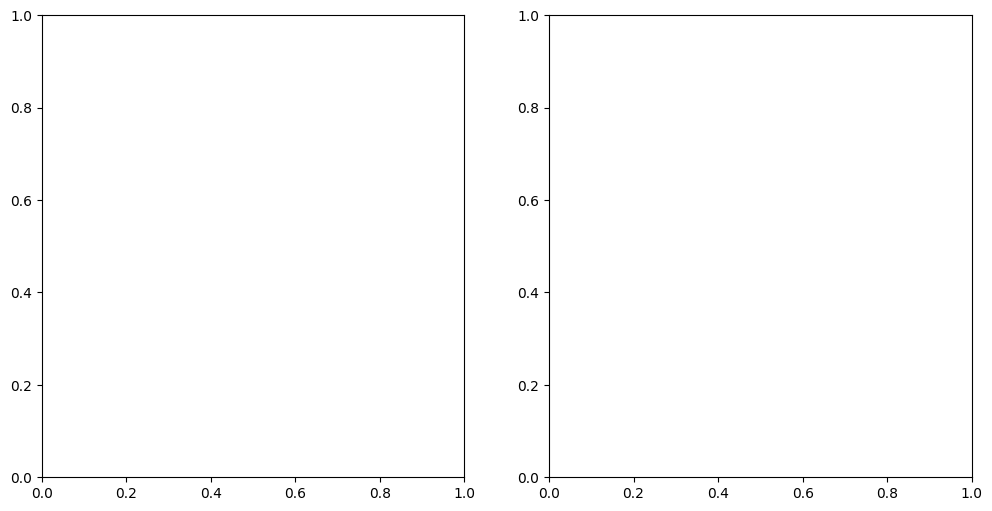

In [2]:
# Function to display normalized images
def display_normalized_images(directory, num_samples=2):
    images = []
    # Iterate over the directory and select sample images
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            images.append(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))
            if len(images) == num_samples:
                break
        if len(images) == num_samples:
            break
    
    print("Number of images:", len(images))
    
    # Display the selected images
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 6))
    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title('Noramilzed image Image {}'.format(i+1))
        axes[i].axis('off')
    plt.show()

# Display 2 sample images from the directory
display_normalized_images(normalizedImages_data_directory, num_samples=2)


In [7]:
image_files = os.listdir('normalized_images_equal_ratio/NORMAL')

# Select 1200 random indices
selected_indices = random.sample(range(len(image_files)), min(1260, len(image_files)))

# Use these indices to select the corresponding images
selected_images = [image_files[i] for i in selected_indices]

# Define the directory
dir = 'normalized_images_equal_ratio/NORMAL'

# Delete the images that are not in the selected_images list
for file in os.listdir(dir):
    if file not in selected_images and os.path.isfile(os.path.join(dir, file)):
        os.remove(os.path.join(dir, file))

In [6]:
image_files = os.listdir('normalized_images_equal_ratio/PNEUMONIA')

# Select 1200 random indices
selected_indices = random.sample(range(len(image_files)), min(1260, len(image_files)))

# Use these indices to select the corresponding images
selected_images = [image_files[i] for i in selected_indices]

# Define the directory
dir = 'normalized_images_equal_ratio/PNEUMONIA'

# Delete the images that are not in the selected_images list
for file in os.listdir(dir):
    if file not in selected_images and os.path.isfile(os.path.join(dir, file)):
        os.remove(os.path.join(dir, file))

In [13]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

class_names = ['PNEUMONIA', 'NORMAL']

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    normalizedImages_data_directory,
    #train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    normalizedImages_data_directory_valid,
    #validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)




94765736/94765736 [==============================] - 41s 0us/step

Found 2520 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/5


 6/79 [=>............................] - ETA: 26:00 - loss: 2.1598 - accuracy: 0.6979

KeyboardInterrupt: 